In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EDA Questions

1. Display Top 10 Rows of The Dataset  
2. Check Last 10 Rows of The Dataset  
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)  
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement  
5. Check Null Values In The Dataset  
6. Drop ID, Notes, Agency, and Status Columns  
7. Get Overall Statistics About The Dataframe  
8. Find Occurrence of The Employee Names (Top 5)  
9. Find The Number of Unique Job Titles  
10. Total Number of Job Titles Contain Captain  
11. Display All the Employee Names From Fire Department  
12. Find Minimum, Maximum, and Average BasePay  
13. Replace 'Not Provided' in EmployeeName Column to NaN  
14. Drop The Rows Having 5 Missing Values  
15. Find Job Title of ALBERT PARDINI  
16. How Much ALBERT PARDINI Make (Include Benefits)?  
17. Display Name of The Person Having The Highest BasePay  
18. Find Average BasePay of All Employee Per Year  
19. Find Average BasePay of All Employee Per JobTitle  
20. Find Average BasePay of Employee Having Job Title ACCOUNTANT  
21. Find Top 5 Most Common Jobs  

---

## Visualization Questions

22. Plot Distribution of BasePay (Histogram with KDE)  
23. Top 10 Job Titles by Average BasePay (Barplot)  
24. TotalPay Over the Years (Trend Analysis using Lineplot)


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


data = pd.read_csv('Salaries.csv')
data

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_17280\105613275.py:7: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


# Display top 10 rows

In [7]:
data.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


# Display last 10 rows

In [8]:
data.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


# How many columns and rows in dataset

In [9]:
# method 1

data.shape

print("The total rows are:",data.shape[0])
print("the total columns are:",data.shape[1])

The total rows are: 148654
the total columns are: 13


In [10]:
# method 2
print(len(data.columns),len(data))

13 148654


# Getting info

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


# Drop ID,Notes,Agency and status column

In [12]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [13]:
data.drop(['Id','Notes','Agency','Status'],axis=1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014


# Overall Statistics

In [14]:
data.describe(include='all')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148049.0,148654.0,148654.0,112495.0,148654.000000,148654.000000,148654.000000,0.0,148654,38119
unique,NaN,110811,2159,109900.0,66555.0,84968.0,99635.0,NaN,NaN,NaN,NaN,1,2
top,NaN,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,San Francisco,FT
freq,NaN,13,7036,875.0,66103.0,35218.0,1053.0,NaN,NaN,NaN,NaN,148654,22334
mean,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


# Find the occurance of employee name

In [15]:
data['EmployeeName'].value_counts()

EmployeeName
Kevin Lee                 13
William Wong              11
Richard Lee               11
Steven Lee                11
John Chan                  9
                          ..
Saoirse C Brownfield       1
Miguel P Lucana            1
Johnmark L Henderson       1
Laura R Epstein-Norris     1
Kesha Mcwhorter            1
Name: count, Length: 110811, dtype: int64

# Find the number of unique job title

In [16]:
data['JobTitle'].nunique()

2159

# Total Number of job title contains 'Captain'

In [17]:
len(data[data['JobTitle'].str.contains('CAPTAIN',case=False)])

552

# Display all the employee names from fire deparment

In [18]:
data[data['JobTitle'].str.contains('fire',case=False)]['EmployeeName']

4            PATRICK GARDNER
6                  ALSON LEE
8             MICHAEL MORRIS
9         JOANNE HAYES-WHITE
10             ARTHUR KENNEY
                 ...        
145956      Kenneth C Farris
147556         Edward A Dunn
148021        Kari A Johnson
148209          Sheryl K Lee
148554       Lawrence F Gatt
Name: EmployeeName, Length: 5879, dtype: object

# Find Maximum, Minimum and Avg BasePay

In [19]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [20]:
data['BasePay'] = pd.to_numeric(data['BasePay'], errors='coerce')

print("Maximum BasePay:", data['BasePay'].max())
print("Minimum BasePay:", data['BasePay'].min())
print("Average BasePay:", data['BasePay'].mean())

Maximum BasePay: 319275.01
Minimum BasePay: -166.01
Average BasePay: 66325.44884048769


# Replace 'Not Provided' in EmployeeName' Column to NaN 

In [21]:
import numpy as np
data['EmployeeName']=data['EmployeeName'].replace('Not provided',np.nan)
data['EmployeeName']

0            NATHANIEL FORD
1              GARY JIMENEZ
2            ALBERT PARDINI
3         CHRISTOPHER CHONG
4           PATRICK GARDNER
                ...        
148649        Roy I Tillery
148650                  NaN
148651                  NaN
148652                  NaN
148653            Joe Lopez
Name: EmployeeName, Length: 148654, dtype: object

# Drop rows having 5 missing Values

In [22]:
data.drop(data[data.isnull().sum(axis=1)==5].index,axis=0)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,NaN,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,NaN,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,NaN,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


# Find Job Title of ALBERT PARDINI

In [23]:
data[data['EmployeeName']=='ALBERT PARDINI']['JobTitle']

2    CAPTAIN III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

# How Much ALBERT PARDINI Make (Include Benefits)?

In [24]:
data[data['EmployeeName']=='ALBERT PARDINI']['TotalPayBenefits']

2    335279.91
Name: TotalPayBenefits, dtype: float64

# Display Name of The Person Having The Highest BasePay

In [25]:
data[data['BasePay'].max()==data['BasePay']]['EmployeeName']

72925    Gregory P Suhr
Name: EmployeeName, dtype: object

# Find Average BasePay of All Employee Per Job Title 

In [26]:
data['BasePay'] = pd.to_numeric(data['BasePay'], errors='coerce')

average_basepay = data.groupby('JobTitle')['BasePay'].mean()
print(average_basepay)


JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2159, dtype: float64


# Find Average BasePay of Employee Having Job Title ACCOUNTANT

In [27]:
data[data['JobTitle'] == 'ACCOUNTANT']['BasePay'].mean()

np.float64(46643.172)

# Find Top 5 Most Common Jobs

In [28]:
data['JobTitle'].value_counts().head()

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

# Top 10 Job Titles by Average BasePay

C:\Users\DAKSH LAKHI\AppData\Local\Temp\ipykernel_17280\3179916047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x='BasePay', y='JobTitle', palette='Blues_r')


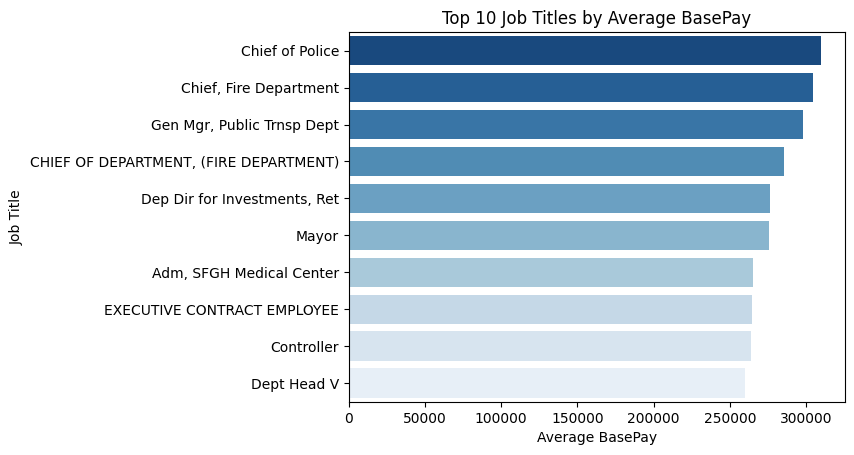

In [29]:
top_jobs = data.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=top_jobs, x='BasePay', y='JobTitle', palette='Blues_r')

# optional
plt.title('Top 10 Job Titles by Average BasePay')
plt.xlabel('Average BasePay')
plt.ylabel('Job Title')


plt.show()

# Distribution of BasePay (Histogram)

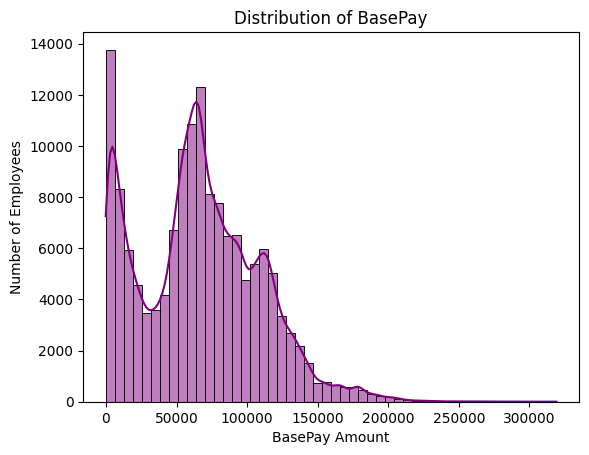

In [30]:
sns.histplot(data['BasePay'],bins=50,kde=True,color='purple')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay Amount')
plt.ylabel('Number of Employees')
plt.show()

# abc

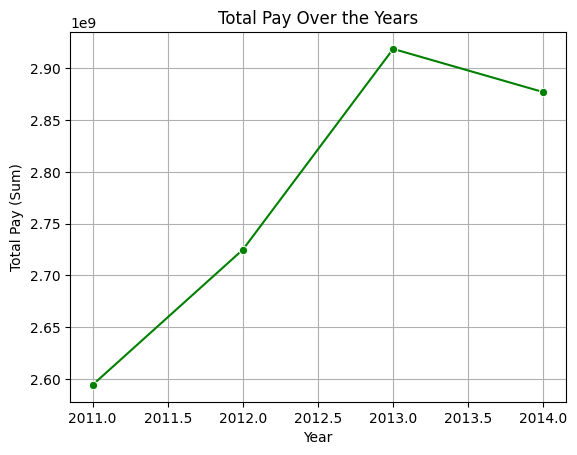

In [31]:
yearly_pay = data.groupby('Year')['TotalPay'].sum().reset_index()
sns.lineplot(data=yearly_pay,x='Year',y='TotalPay',marker='o', color='green')
plt.title('Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Pay (Sum)')
plt.grid(True)
plt.show()